In [1]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import torchmetrics as tm

# Device configuration
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2]:
from operator import itemgetter
import numpy as np
import pandas as pd

In [22]:
bs = 1000

# CIFAR10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        transforms.Grayscale(1),
])
    
    # 

train_dataset = datasets.CIFAR10(root='./cifar10_data/', train=True, transform=transform, download=False)
test_dataset = datasets.CIFAR10(root='./cifar10_data/', train=False, transform=transform, download=False)



In [23]:
type(train_dataset.data)

numpy.ndarray

In [24]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [25]:
len(train_dataset.targets)

50000

In [27]:
index2 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 2)]
index3 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 3)]
index4 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 4)]
index5 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 5)]
index6 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 6)]
index7 = [index for index in range(len(train_dataset.targets)) if (train_dataset.targets[index] == 7)]

finalindex= index2+index3+index4+index5+index6+index7
finalindex

[6,
 13,
 18,
 24,
 41,
 42,
 47,
 48,
 54,
 55,
 57,
 63,
 90,
 108,
 120,
 121,
 123,
 138,
 144,
 171,
 194,
 196,
 218,
 271,
 281,
 283,
 288,
 300,
 303,
 335,
 356,
 358,
 383,
 400,
 402,
 403,
 411,
 421,
 423,
 425,
 463,
 474,
 483,
 502,
 510,
 513,
 522,
 533,
 538,
 539,
 540,
 544,
 558,
 559,
 560,
 586,
 630,
 646,
 648,
 649,
 673,
 689,
 696,
 701,
 709,
 724,
 737,
 742,
 775,
 778,
 779,
 787,
 790,
 796,
 800,
 802,
 803,
 804,
 808,
 810,
 820,
 827,
 829,
 830,
 832,
 849,
 864,
 885,
 889,
 907,
 910,
 912,
 924,
 933,
 957,
 963,
 975,
 986,
 990,
 1003,
 1008,
 1009,
 1024,
 1040,
 1050,
 1065,
 1067,
 1077,
 1084,
 1107,
 1108,
 1110,
 1122,
 1129,
 1139,
 1146,
 1163,
 1180,
 1184,
 1189,
 1207,
 1209,
 1219,
 1258,
 1267,
 1283,
 1285,
 1288,
 1291,
 1295,
 1307,
 1328,
 1334,
 1354,
 1359,
 1372,
 1409,
 1415,
 1430,
 1438,
 1440,
 1443,
 1444,
 1458,
 1475,
 1478,
 1492,
 1497,
 1500,
 1501,
 1523,
 1527,
 1530,
 1532,
 1533,
 1542,
 1566,
 1576,
 1606,


In [28]:
tindex2 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 2)]
tindex3 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 3)]
tindex4 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 4)]
tindex5 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 5)]
tindex6 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 6)]
tindex7 = [index for index in range(len(test_dataset.targets)) if (test_dataset.targets[index] == 7)]

tfinalindex= tindex2+tindex3+tindex4+tindex5+tindex6+tindex7
tfinalindex

[25,
 35,
 65,
 67,
 70,
 75,
 84,
 86,
 113,
 118,
 123,
 129,
 135,
 138,
 147,
 149,
 156,
 160,
 182,
 183,
 195,
 219,
 248,
 249,
 266,
 270,
 291,
 303,
 307,
 322,
 340,
 342,
 353,
 354,
 357,
 374,
 384,
 387,
 388,
 391,
 393,
 396,
 409,
 424,
 430,
 436,
 448,
 449,
 450,
 497,
 498,
 537,
 548,
 559,
 563,
 564,
 569,
 592,
 603,
 618,
 623,
 630,
 655,
 674,
 691,
 692,
 697,
 701,
 706,
 725,
 731,
 740,
 748,
 751,
 754,
 755,
 758,
 765,
 775,
 776,
 799,
 813,
 821,
 832,
 833,
 837,
 839,
 843,
 846,
 848,
 873,
 877,
 900,
 931,
 933,
 935,
 936,
 972,
 980,
 988,
 1038,
 1039,
 1043,
 1046,
 1051,
 1083,
 1095,
 1099,
 1108,
 1110,
 1126,
 1132,
 1146,
 1148,
 1150,
 1151,
 1172,
 1196,
 1202,
 1240,
 1248,
 1251,
 1254,
 1257,
 1277,
 1278,
 1297,
 1307,
 1321,
 1325,
 1330,
 1348,
 1352,
 1356,
 1367,
 1374,
 1382,
 1392,
 1399,
 1450,
 1451,
 1456,
 1479,
 1481,
 1495,
 1496,
 1501,
 1502,
 1505,
 1507,
 1515,
 1528,
 1539,
 1547,
 1567,
 1575,
 1581,
 1587,
 1

In [29]:
train_dataset.targets = list(itemgetter(*finalindex)(train_dataset.targets))
train_dataset.data = np.array(itemgetter(*finalindex)(train_dataset.data))

In [30]:
train_dataset.data.shape

(30000, 32, 32, 3)

In [31]:
test_dataset.targets = list(itemgetter(*tfinalindex)(test_dataset.targets))
test_dataset.data = np.array(itemgetter(*tfinalindex)(test_dataset.data))

In [32]:
# Data Loader (Input Pipeline)
if torch.cuda.is_available():
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True, num_workers=6)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False, num_workers=6)
else: 
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True, num_workers=0)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False, num_workers=0)

In [33]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super().__init__()       
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, g_output_dim)
    
    # forward method
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        return torch.tanh(self.fc4(x))
    
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super().__init__()
        self.fc1 = nn.Linear(d_input_dim, d_input_dim*2)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)
        self.fc4 = nn.Linear(self.fc3.out_features, 1)
    
    # forward method
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        return torch.sigmoid(self.fc4(x))

In [34]:
train_dataset.data.shape

(30000, 32, 32, 3)

In [35]:
# build network
z_dim = 100
_, dim1, dim2, _ = test_dataset.data.shape
cifar_dim = dim1 * dim2

G = Generator(g_input_dim = z_dim, g_output_dim = cifar_dim).to(device)
D = Discriminator(cifar_dim).to(device)

#Set evaluation metrics

D_realacc = tm.classification.BinaryAccuracy().to(device)
D_fakeacc = tm.classification.BinaryAccuracy().to(device)
D_accuracy = tm.classification.BinaryAccuracy().to(device)
G_accuracy = tm.classification.BinaryAccuracy().to(device)

In [36]:
G

Generator(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1024, bias=True)
  (fc4): Linear(in_features=1024, out_features=1024, bias=True)
)

In [37]:
D

Discriminator(
  (fc1): Linear(in_features=1024, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=1, bias=True)
)

In [38]:
# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)

In [39]:
def D_train(x):
    #=======================Train the discriminator=======================#

    D.zero_grad()

    # train discriminator on real
    x_real, y_real = x.view(-1, cifar_dim), torch.ones(bs, 1)
    x_real, y_real = Variable(x_real.to(device)), Variable(y_real.to(device))

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_pred = D_output
    D_real_target = torch.ones_like(D_real_pred)

    # train discriminator on fake
    z = Variable(torch.randn(bs, z_dim).to(device))
    x_fake, y_fake = G(z), Variable(torch.zeros(bs, 1).to(device))

    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_pred = D_output
    D_fake_target = torch.zeros_like(D_fake_pred)

    # evaluation metrics
    D_realacc.update(D_real_pred, D_real_target)
    D_fakeacc.update(D_fake_pred, D_fake_target)
    D_accuracy.update(torch.cat((D_real_pred, D_fake_pred), -1), torch.cat((D_real_target, D_fake_target), -1))
    G_accuracy.update(D_fake_pred, D_real_target)
    # gradient backprop & optimize ONLY D's parameters
    D_loss = (D_real_loss + D_fake_loss) / 2 # average of real loss and fake loss
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()

In [40]:
def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()

    z = Variable(torch.randn(bs, z_dim).to(device))
    y = Variable(torch.ones(bs, 1).to(device))

    G_output = G(z)
    D_output = D(G_output)
    # Generator loss is the BCE loss of the discriminator output (whether image is real or generated) against labels (set to all real images)
    # This value is 0 when the discriminator thinks all generated images are real. So this value should trend to 0. 
    G_loss = criterion(D_output, y)  

    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()

In [41]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    D.to(device)
    D = nn.DataParallel(D)
    print("D moved to GPU and using data parallelism")
else:
    print("GPU is not available, using CPU instead")   

if torch.cuda.is_available():
    device = torch.device("cuda")
    G.to(device)
    G = nn.DataParallel(G)
    print("G moved to GPU and using data parallelism")
else:
    print("GPU is not available, using CPU instead")    

GPU is not available, using CPU instead
GPU is not available, using CPU instead


[1/20]: loss_d: 0.586, loss_g: 0.715
[2/20]: loss_d: 0.467, loss_g: 1.824
[3/20]: loss_d: 0.354, loss_g: 2.896
[4/20]: loss_d: 0.198, loss_g: 2.161
[5/20]: loss_d: 0.206, loss_g: 1.866
[6/20]: loss_d: 0.307, loss_g: 3.351
[7/20]: loss_d: 0.190, loss_g: 6.218
[8/20]: loss_d: 0.064, loss_g: 10.568
[9/20]: loss_d: 0.079, loss_g: 10.265
[10/20]: loss_d: 0.052, loss_g: 10.272
[11/20]: loss_d: 0.063, loss_g: 5.336
[12/20]: loss_d: 0.126, loss_g: 4.667
[13/20]: loss_d: 0.069, loss_g: 4.894
[14/20]: loss_d: 0.633, loss_g: 8.594
[15/20]: loss_d: 0.091, loss_g: 10.993
[16/20]: loss_d: 0.219, loss_g: 12.532
[17/20]: loss_d: 0.075, loss_g: 5.747
[18/20]: loss_d: 0.113, loss_g: 4.585
[19/20]: loss_d: 0.105, loss_g: 4.659
[20/20]: loss_d: 0.088, loss_g: 5.878


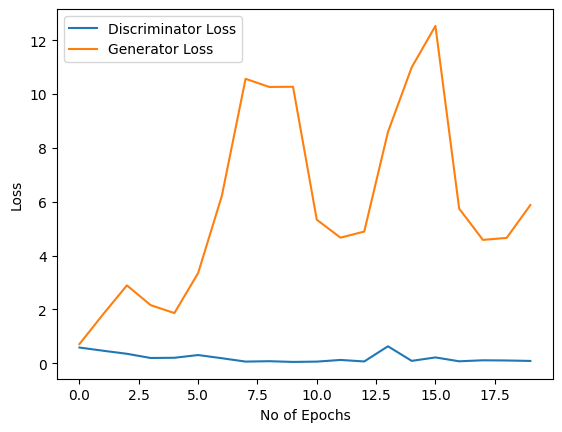

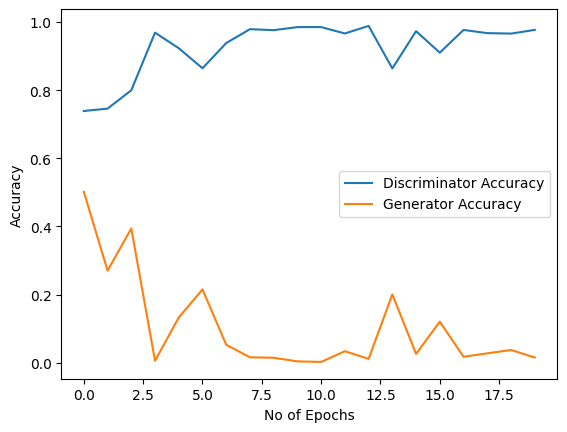

In [42]:
n_epoch = 20
D_losses, G_losses = [], []
D_r_acc, D_f_acc = [], []
D_acc, G_acc = [], []
test_z = Variable(torch.randn(100, z_dim).to(device))

for epoch in range(1, n_epoch+1):           
    
    D_batch_losses, G_batch_losses = [], []



    for batch_idx, (x, _) in enumerate(train_loader):
        D_batch_losses.append(D_train(x))
        G_batch_losses.append(G_train(x))


    D_r_acc.append(D_realacc.compute())
    D_f_acc.append(D_fakeacc.compute())
    D_acc.append(D_accuracy.compute())
    G_acc.append(G_accuracy.compute())

    D_epochloss = torch.mean(torch.FloatTensor(D_batch_losses))
    G_epochloss = torch.mean(torch.FloatTensor(G_batch_losses))
    D_losses.append(D_epochloss)
    G_losses.append(G_epochloss)

    D_realacc.reset()
    D_fakeacc.reset()
    D_accuracy.reset()
    G_accuracy.reset()
        

    if epoch % 10 == 0:
        with torch.no_grad():
            generated = G(test_z)
            save_image(generated.view(generated.size(0), 1, 32, 32), './cifar samples/Trial 1/sample_{}'.format(epoch) + '.png')


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, D_epochloss, G_epochloss))

plt.figure()
plt.plot(D_losses, label="Discriminator Loss")
plt.plot(G_losses, label="Generator Loss")
plt.legend()
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.savefig('./cifar samples/Trial 1/Loss_plot.png')

plt.figure()
plt.plot(D_acc, label="Discriminator Accuracy")
plt.plot(G_acc, label="Generator Accuracy")
plt.legend()
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.savefig('./cifar samples/Trial 1/Acc_plot.png')
